<a href="https://colab.research.google.com/github/JCaballerot/Deep_learning_program/blob/main/Deep_learning_program/Modulo_II/classCode_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## CNN using Keras

In [ ]:
# Import library

import tensorflow as tf
from tensorflow import keras as keras
from keras.datasets import mnist


In [ ]:
#load mnist dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()


11501568/11490434 [==============================] - 0s 0us/step


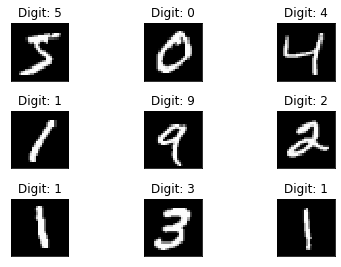

In [ ]:
# Plotting images

import matplotlib.pyplot as plt
fig = plt.figure()

for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(X_train[i], cmap='gray', interpolation='none')
  plt.title("Digit: {}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])



In [ ]:
# Categorize target
num_category = 10

y_train = keras.utils.to_categorical(y_train, num_classes = num_category)
y_test  = keras.utils.to_categorical(y_test, num_classes = num_category)


In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
# Reshape input

img_rows = 28
img_cols = 28
chanels = 1

X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, chanels)
X_test  = X_test.reshape( X_test.shape[0],  img_rows, img_cols, chanels)
input_shape = (img_rows, img_cols, chanels)


In [ ]:
# Scale data

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

print('X_train shape:', X_train.shape) 


X_train shape: (60000, 28, 28, 1)


In [ ]:

# model Building

model = keras.models.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size = (3, 3), padding="valid", activation='relu', input_shape = input_shape))
model.add(keras.layers.Conv2D(64, kernel_size = (3, 3), padding="valid", activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Dropout(0.25))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(num_category, activation='softmax'))


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1179776   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

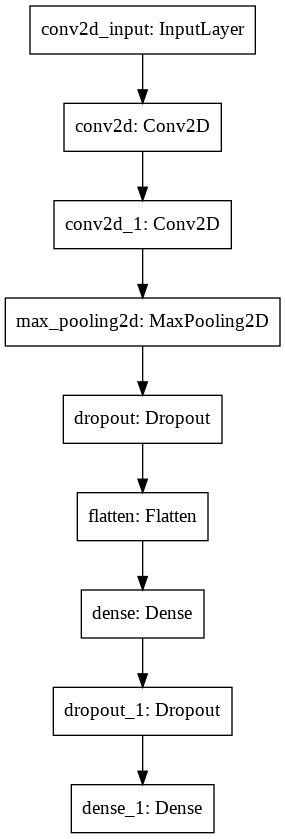

In [ ]:
tf.keras.utils.plot_model(model)

In [ ]:
# Optimization 

model.compile(loss = keras.losses.categorical_crossentropy,
              optimizer = keras.optimizers.Adadelta(learning_rate = 0.1, rho = 0.05),
              metrics = ['accuracy'])



In [ ]:
batch_size = 10000
num_epoch = 30

early_stopping = keras.callbacks.EarlyStopping(patience = 5, restore_best_weights = True)

#model training
history = model.fit(X_train, y_train,
                    batch_size = batch_size,
                    epochs = num_epoch,
                    verbose = 1,
                    validation_data = (X_test, y_test),
                    callbacks = [early_stopping])


Epoch 1/30
6/6 [==============================] - 19s 245ms/step - loss: 2.2743 - accuracy: 0.1377 - val_loss: 2.2178 - val_accuracy: 0.3411
Epoch 2/30
6/6 [==============================] - 1s 207ms/step - loss: 2.1885 - accuracy: 0.2758 - val_loss: 2.0995 - val_accuracy: 0.6053
Epoch 3/30
6/6 [==============================] - 1s 207ms/step - loss: 2.0666 - accuracy: 0.4089 - val_loss: 1.9398 - val_accuracy: 0.6772
Epoch 4/30
6/6 [==============================] - 1s 205ms/step - loss: 1.9049 - accuracy: 0.5059 - val_loss: 1.7394 - val_accuracy: 0.7065
Epoch 5/30
6/6 [==============================] - 1s 207ms/step - loss: 1.7102 - accuracy: 0.5721 - val_loss: 1.5112 - val_accuracy: 0.7335
Epoch 6/30
6/6 [==============================] - 1s 207ms/step - loss: 1.5087 - accuracy: 0.6130 - val_loss: 1.2751 - val_accuracy: 0.7565
Epoch 7/30
6/6 [==============================] - 1s 206ms/step - loss: 1.3113 - accuracy: 0.6460 - val_loss: 1.0569 - val_accuracy: 0.7863
Epoch 8/30
6/6 [===

# GPU model using Keras

In [ ]:
import tensorflow as tf


In [ ]:
# Create a MirroredStrategy.
strategy = tf.distribute.MirroredStrategy()
print('Number of devices: {}'.format(strategy.num_replicas_in_sync))
 

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
Number of devices: 1


In [ ]:

# Open a strategy scope.
with strategy.scope():
  # Everything that creates variables should be under the strategy scope.
  # In general this is only model construction & `compile()`.
  model = keras.models.Sequential()

  model.add(keras.layers.Conv2D(32, kernel_size = (3, 3), padding="valid", activation='relu', input_shape = input_shape))
  model.add(keras.layers.Conv2D(64, kernel_size = (3, 3), padding="valid", activation='relu'))
  model.add(keras.layers.MaxPooling2D(pool_size = (2, 2)))

  model.add(keras.layers.Dropout(0.25))
  model.add(keras.layers.Flatten())

  model.add(keras.layers.Dense(128, activation='relu'))
  model.add(keras.layers.Dropout(0.5))
  model.add(keras.layers.Dense(num_category, activation='softmax'))


In [ ]:
model.compile(loss = keras.losses.categorical_crossentropy,
              optimizer = keras.optimizers.Adadelta(learning_rate=0.1, rho = 0.05),
              metrics = ['accuracy'])

INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).


In [ ]:
batch_size = 10000
num_epoch = 30

early_stopping = keras.callbacks.EarlyStopping(patience = 5, restore_best_weights = True)

#model training
history = model.fit(X_train, y_train,
                    batch_size = batch_size,
                    epochs = num_epoch,
                    verbose = 1,
                    validation_data=(X_test, y_test),
                    callbacks = [early_stopping])


Epoch 1/30
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
6/6 [==============================] - 3s 259ms/step - loss: 2.2862 - accuracy: 0.1383 - val_loss: 2.2579 - val_accuracy: 0.2574
Epoch 2/30
6/6 [====

(0.0, 3.0)

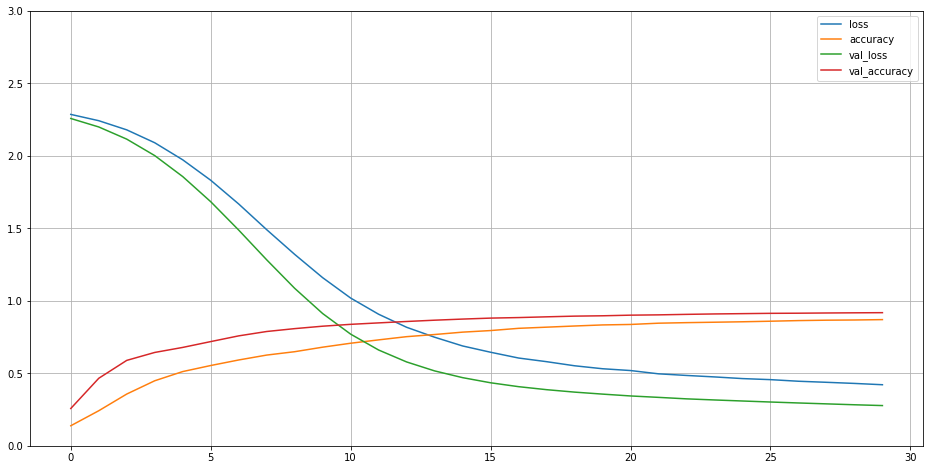

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


pd.DataFrame(history.history).plot(figsize=(16, 8)) 
plt.grid(True)
plt.gca().set_ylim(0, 3) # set the vertical range to [0-1] plt.show()